In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Import packages

import catboost
import sklearn

print("CatBoost Version     : ", catboost.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

CatBoost Version     :  1.0.6
Scikit-Learn Version :  1.1.1


In [3]:
# Load the 'letter recognition' dataset

lettersdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\lettersdata_N.csv", header=0)

# Copy the file to back-up file

lettersdata_bk = lettersdata.copy()

# display first five records

lettersdata.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
3,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
4,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7


In [4]:
# Display the dataset information

lettersdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  7752 non-null   object
 1   xbox    7752 non-null   int64 
 2   ybox    7752 non-null   int64 
 3   width   7752 non-null   int64 
 4   height  7752 non-null   int64 
 5   onpix   7752 non-null   int64 
 6   xbar    7752 non-null   int64 
 7   ybar    7752 non-null   int64 
 8   x2bar   7752 non-null   int64 
 9   y2bar   7752 non-null   int64 
 10  xybar   7752 non-null   int64 
 11  x2ybar  7752 non-null   int64 
 12  xy2bar  7752 non-null   int64 
 13  xedge   7752 non-null   int64 
 14  xedgey  7752 non-null   int64 
 15  yedge   7752 non-null   int64 
 16  yedgex  7752 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 1.0+ MB


In [4]:
# Display the count of each letter

lettersdata['letter'].value_counts(sort=False)

T    796
D    805
S    748
B    766
A    789
R    758
C    736
P    803
E    768
Q    783
Name: letter, dtype: int64

In [5]:
# Identify the independent and Target variables

IndepVar = []
for col in lettersdata.columns:
    if col != 'letter':
        IndepVar.append(col)

TargetVar = 'letter'

x = lettersdata[IndepVar]
y = lettersdata[TargetVar]

In [6]:
# Import LabelEncoder and convert the target variable from object to integer values

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#creating labelEncoder

le = preprocessing.LabelEncoder()

# Converting string labels into numbers.

y=le.fit_transform(y)

y=pd.DataFrame(y)

In [7]:
# Split into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5814, 16), (1938, 16), (5814, 1), (1938, 1))

In [8]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [9]:
# CatBoostClassifier is used for multiclass classification problems

from catboost import CatBoostClassifier
from catboost.utils import eval_metric

modelCBR = CatBoostClassifier(iterations=100, verbose=10)

modelCBR.fit(x_train, y_train, eval_set=(x_test, y_test))

modelCBR.set_feature_names(x_train)

Learning rate set to 0.269536
0:	learn: 1.5387666	test: 1.7444610	best: 1.7444610 (0)	total: 150ms	remaining: 14.9s
10:	learn: 0.4986635	test: 0.8354385	best: 0.8354385 (10)	total: 351ms	remaining: 2.84s
20:	learn: 0.3045350	test: 0.5918237	best: 0.5918237 (20)	total: 542ms	remaining: 2.04s
30:	learn: 0.2228512	test: 0.4815772	best: 0.4815772 (30)	total: 746ms	remaining: 1.66s
40:	learn: 0.1646800	test: 0.3998518	best: 0.3998518 (40)	total: 936ms	remaining: 1.35s
50:	learn: 0.1308365	test: 0.3650327	best: 0.3644315 (49)	total: 1.18s	remaining: 1.13s
60:	learn: 0.1114249	test: 0.3412450	best: 0.3412450 (60)	total: 1.38s	remaining: 882ms
70:	learn: 0.0950967	test: 0.3219504	best: 0.3219504 (70)	total: 1.57s	remaining: 643ms
80:	learn: 0.0830912	test: 0.3081683	best: 0.3081683 (80)	total: 1.77s	remaining: 415ms
90:	learn: 0.0730065	test: 0.2943981	best: 0.2941934 (88)	total: 1.95s	remaining: 193ms
99:	learn: 0.0658276	test: 0.2825051	best: 0.2825051 (99)	total: 2.14s	remaining: 0us

bestT

In [10]:
# Predict the model with test data set

y_pred = modelCBR.predict(x_test)
y_pred_prob = modelCBR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-9

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    #--------------------------------------------------------------------------------------

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean() 

from statistics import mean
import math

print('---------------------------------------------------------------------------------------------------------------')
print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

[[203   0   0   1   0   1   0   0   2   0]
 [  0 149   0   9   7   5   0   7   1   3]
 [  0   0 164   0   0   0   0   0   0   0]
 [  0   1   0 192   0   0   0   1   2   0]
 [  0   0   8   0 177   3   0   1  14   0]
 [  0   0   0   0   0 186   0   0   0   0]
 [  0   2   2   3   1   4 168   0   0   1]
 [  0  14   1  17   2   3   1 185   1   1]
 [  0  23   0   2   5   0   2   3 159   4]
 [  0   0   1   0   1   2   0   0   0 193]]
Print Class: 0
TP=203, FN=4, TN=1731, FP=0
Accuracy: 0.998
Precision: 1.0
Sensitivity: 0.981
F1-Score: 0.99
Specificity: 1.0
Balanced Accuracy: 0.99
MCC: 0.989

Print Class: 1
TP=149, FN=32, TN=1717, FP=40
Accuracy: 0.963
Precision: 0.788
Sensitivity: 0.823
F1-Score: 0.805
Specificity: 0.977
Balanced Accuracy: 0.9
MCC: 0.785

Print Class: 2
TP=164, FN=0, TN=1762, FP=12
Accuracy: 0.994
Precision: 0.932
Sensitivity: 1.0
F1-Score: 0.965
Specificity: 0.993
Balanced Accuracy: 0.996
MCC: 0.962

Print Class: 3
TP=192, FN=4, TN=1710, FP=32
Accuracy: 0.981
Precision: 0.85

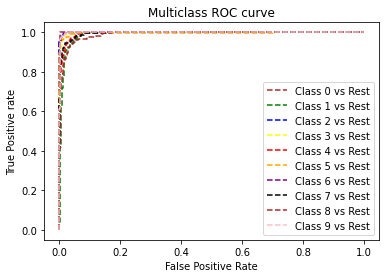

In [11]:
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='orange', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='purple', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='black', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='brown', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='pink', label='Class 9 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=600);  

In [12]:
# ROC AUC score - one-vs-rest (OvR) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted'),3))

roc_auc_score: 0.996
